# Implémenter la classe arbre binaire
> Cours NSI Terminale - Thème 1.
- toc: true
- badges: true
- comments: false
- categories: [python, NSI, Terminale, Structure_donnees, POO, TP]
- image: images/nsi1.png

In [1]:
# Validez cette cellule pour importer graphviz
# Ce module permet de dessiner des arbres et des graphes
from graphviz import Digraph

Dans ce TP nous allons implémenter une classe permettant de représenter un arbre binaire.

On va pour cela créer un objet **Noeud** qui aura 3 propriétés (ou attributs) :
- La propriété **valeur** contiendra la valeur associée au noeud.
- Les propriétés **gauche** et **droit** seront les sous arbres gauche et droit.

Les deux propriétés **gauche** et **droit** seront  des instances de la classe **Noeud**. Si il n'y a pas de sous arbre gauche ou droit, on indiquera la valeur **None** dans les propriétés correspondantes.


Dans notre classe **Noeud**, nous créerons 3 méthodes :
- La méthode **est_feuille()** renverra un bouléen selon que l'objet est une feuille ou non.
- La méthode **cree_feuille_gauche()** prend en paramètre une valeur et crée une feuille à gauche dont la valeur est passée en paramètres.
- La méthode **cree_feuille_droite()** est construite sur le même modèle que **cree_feuille_gauche()**.

## Exemple d'utilisation de la classe Noeud

En supposant la classe **Noeud** créée, voici comment on l'utilise pour créer cet arbre
![exemple1](https://github.com/wawachief/fp-notebooks/blob/master/_notebooks/my_icons/exemple1.png?raw=1)
```python
arbre = Noeud("A")
sous_arbre_gauche = arbre.cree_fils_gauche("B")
sous_arbre_gauche.cree_fils_gauche("D")
arbre.cree_fils_droit("C")

# Quelques vérifications possibles
print(arbre.est_feuille())
print(arbre.droit.est_feuille())
print(arbre.gauche.valeur)
# Affiche False True B
```

In [2]:
class Noeud():

    # la méthode __repr__ définit ce qui sera affiché
    # lorsqu'on tapera l'objet dans Jupyter ou un terminal
    # Ici, on affiche juste la valeur du noeud
    def __init__(self, etiquette):
        self.valeur = etiquette
        self.gauche = None
        self.droit = None

    def __repr__(self):
        return str(self.valeur)


    # Codez ici les méthodes demandées
    # YOUR CODE HERE
    #raise NotImplementedError()
    def cree_fils_gauche(self, etiquette):
        self.gauche = Noeud(etiquette)
        return self.gauche
    def cree_fils_droit(self, etiquette):
        self.droit = Noeud(etiquette)
        return self.droit


    def est_feuille(self):
        if self.gauche == None and self.droit == None:
            return True
        else:
            return False


In [3]:
# Testez ici les méthodes de votre classe
a = Noeud(2)
print(f"L'etiquette du noeud racine est : {a}")
a.cree_fils_gauche(1)
print(f"L'etiquette du noeud à gauche de la racine est : {a.gauche}")
a.gauche.cree_fils_gauche(0)
print(f"L'etiquette du noeud à gauche-gauche de racine est : {a.gauche.gauche}")
a.droit = Noeud("f")
a.droit.est_feuille()

L'etiquette du noeud racine est : 2
L'etiquette du noeud à gauche de la racine est : 1
L'etiquette du noeud à gauche-gauche de racine est : 0


True

In [4]:
# Tester l'exemple de départ

racine = Noeud("A")
sous_arbre_gauche = racine.cree_fils_gauche("B")
sous_arbre_gauche.cree_fils_gauche("D")
racine.cree_fils_droit("C")

assert not racine.est_feuille()
assert racine.droit.est_feuille()
assert racine.gauche.valeur == "B"

## Pour aller plus loin

On peut compléter cette classe **Noeud** par une nouvelle classe décrivant un objet **Arbrebin**. Un arbre va contenir le **Noeud** racine ainsi que des méthodes permettant l'affichage de l'arbre ou appliquant des algorithmes sur cet arbre.

Nous verrons un peu plus tard dans l'année quelques uns de ces algorithmes. Néanmoins, pour vous donner un aperçu, voici une première ébauche de la classe **Arbrebin** qui nous sera utile pour visualiser facilement les arbres sur lesquels nous travaillerons.

Dans un premier temps, il n'est pas strictement nécessaire de comprendre les détails du fonctionnement de la méthode **show** car celle-ci fait appel à de la *récursivité* qui sera étudiée un peu plus tard.

In [5]:
class Arbrebin:
    """Représente un objet arbre binaire
    - Propriétés :
        * racine : objet de type Noeud désignant la racine de l'arbre
    - Méthodes :
        * show() : représentation graphique de l'arbre à l'aide de graphviz
    """

    def __init__(self, racine):
        self.racine = racine

    def show(self):
        """Renvoie un objet graphviz pour la visualisation graphique de l'arbre"""
        def representation(dot, noeud, aretes):
            # Ajoute la représentation du noeud à la représentation dot de l'arbre
            if noeud is not None:
                dot.node(str(id(noeud)), str(noeud.valeur))
                # Appel récursif de la fonction representation
                if noeud.gauche is not None:
                    representation(dot, noeud.gauche, aretes)
                    aretes.append((str(id(noeud)) , str(id(noeud.gauche))))
                if noeud.droit is not None:
                    representation(dot, noeud.droit, aretes)
                    aretes.append((str(id(noeud)) , str(id(noeud.droit))))

        dot = Digraph(comment="Arbre binaire", format='svg')
        aretes = []
        representation(dot, self.racine, aretes)
        dot.edges(aretes)
        return dot

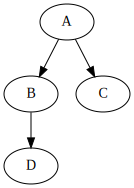

In [6]:
arbre = Arbrebin(racine)
arbre.show()

## A vous de jouer

A présent, vous utiliserez la classe **Noeud** et **Arbrebin** et les méthodes que vous avez développées pour représenter l'arbre suivant dans la variable `expr`.


![expression](https://github.com/wawachief/fp-notebooks/blob/master/_notebooks/my_icons/expr.png?raw=1)

Les opérations seront représentées par des chaînes de caractères. Les feuilles seront des entiers.

In [7]:
# YOUR CODE HERE

racine = Noeud("+")
racine.cree_fils_droit(1)

racine.cree_fils_gauche("-")
racine.gauche.cree_fils_droit("^")
racine.gauche.droit.cree_fils_gauche(3)
racine.gauche.droit.cree_fils_droit(2)

racine.gauche.cree_fils_gauche("x")
racine.gauche.gauche.cree_fils_droit(2)

racine.gauche.gauche.cree_fils_gauche("+")
racine.gauche.gauche.gauche.cree_fils_droit(4)
racine.gauche.gauche.gauche.cree_fils_gauche(2)

expr = Arbrebin(racine)
expr

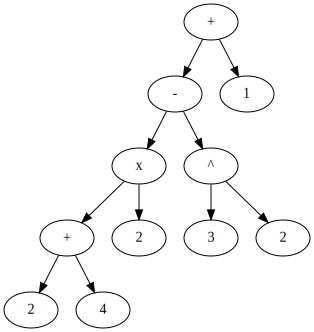

In [8]:
# Validation de la réponse
assert racine.valeur == "+"
assert racine.droit.valeur == 1

expr.show()

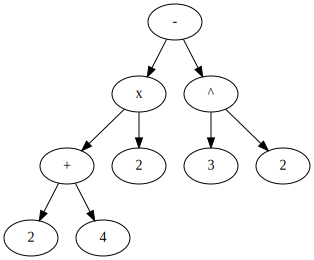

In [9]:
# Afficher le sous arbre gauche :
Arbrebin(racine.gauche).show()

# Conclusion

Nous en resterons la pour le moment. Nous reviendrons sur les arbres plusieurs fois au cours de l'année car cette structure permet de mettre en oeuvre des algorithmes intéressants. Nous complèterons donc notre classe arbre au fur à mesure de la progression de nos conaissance, en particulier lorsque nous étudierons la récursivité.

*TP qui presente un interet pour la creation d'arbre et la visualisation de ces derniers*